In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from collections import OrderedDict
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# Loading Data
X1 = pd.read_csv("Data\parameters_subsample_sneasybrick.csv") 
X2 = pd.read_csv("Data\sneasybrick-ciam_CIAMparameterSamples_nyc_ssp1-26.csv") 
Y = pd.read_csv("Data\sneasybrick-ciam_NPVtrials_nyc_ssp1-26.csv") 

In [11]:
X = pd.concat([X1, X2], axis=1)

In [12]:
# Extracting Feature names
feature_names = X.columns

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [6]:
X.head()

,sd_temp,sd_ocean_heat,sd_glaciers,sd_greenland,sd_antarctic,sd_gmsl,sigma_whitenoise_co2,rho_temperature,rho_ocean_heat,rho_glaciers,...,antarctic_bed_height0,antarctic_slope,antarctic_lambda,antarctic_temp_threshold,dvbm,movefactor,vslel,vslmult,wvel,wvpdl
0,0.088864,1.629600,0.000602,0.000234,0.000614,0.001400,0.171280,0.519427,0.688367,-0.770486,...,816.365551,0.000718,0.018500,-15.368459,1.339955,2.721848,0.620649,127.598114,1.125517,0.606852
1,0.080426,3.439531,0.000060,0.000259,0.000484,0.001208,0.148203,0.516640,0.152661,-0.447865,...,781.222923,0.000729,0.006969,-15.232859,10.387613,2.657516,0.237318,29.810800,1.022699,0.458705
2,0.086473,3.366415,0.000925,0.000235,0.000282,0.001972,0.254878,0.539274,0.971248,0.042140,...,750.372840,0.000581,0.011781,-15.445140,4.872005,0.811141,0.431712,455.707640,1.177063,0.479436
3,0.076089,1.891433,0.000109,0.000233,0.000504,0.001947,0.183595,0.593196,0.253260,0.418986,...,792.667225,0.000707,0.008628,-15.017208,5.230373,0.681943,0.190644,218.819788,1.367217,0.523028
4,0.084604,2.008197,0.000093,0.000235,0.000441,0.002264,0.309075,0.490472,0.951380,-0.722653,...,755.557749,0.000668,0.009988,-15.316005,4.900519,1.749835,0.495039,329.943603,0.961014,0.181124


In [19]:
# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

In [20]:
# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [21]:
df_train.head()

,NPVOptimal,sd_temp,sd_ocean_heat,sd_glaciers,sd_greenland,sd_antarctic,sd_gmsl,sigma_whitenoise_co2,rho_temperature,rho_ocean_heat,...,antarctic_bed_height0,antarctic_slope,antarctic_lambda,antarctic_temp_threshold,dvbm,movefactor,vslel,vslmult,wvel,wvpdl
5663,0.047890,1.303040,-1.544997,-0.473345,1.759990,-0.141930,-1.625535,0.179741,-0.720490,-2.266087,...,-1.581039,-0.350341,0.509757,-0.390695,0.595211,0.294557,0.837000,-1.777675,0.465134,1.267598
2840,0.019852,-0.464178,-0.291550,-0.896062,-0.919514,0.154432,-1.170695,-0.592357,-1.021049,-1.478344,...,-0.401934,0.080697,-0.699954,0.294358,-0.857326,1.132552,-0.889074,-0.987113,1.646179,-0.334074
4550,0.037820,0.306064,0.431190,-0.069182,-0.892415,-0.750003,0.721647,-0.589750,0.480677,0.659484,...,-1.124758,0.784744,-0.216045,-0.702840,-0.467703,-0.032083,0.990827,0.970719,-1.353353,0.370280
17,0.044859,0.198380,-0.027799,-0.593954,-0.307593,-1.127703,1.557020,1.708466,0.028477,-2.766894,...,-0.425931,-1.127895,-1.140164,0.558064,0.885733,1.625859,-1.270316,1.097728,-1.275782,-1.986397
3442,0.043296,1.537660,0.466825,0.039014,-0.338227,0.170566,-0.576736,0.516892,0.216551,-1.671671,...,-0.939634,-0.463189,0.589879,-1.024407,0.512852,0.822359,-0.205136,-0.251980,-1.888463,-0.184110


In [22]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid = { 
            "n_estimators"      : [50, 60, 100, 105, 115, 120],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4,5,6,7,8],
            "max_depth": [12,15,20,22,25,30],
            "bootstrap": [True, False],
            }

CV_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 3)
CV_reg.fit(X_train, y_train)

# Getting the best parameters

CV_reg.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'n_estimators': 100}

MSE for Random Forest on CV train data:  0.0000004439
MSE for Random Forest on test data:  0.0000270540


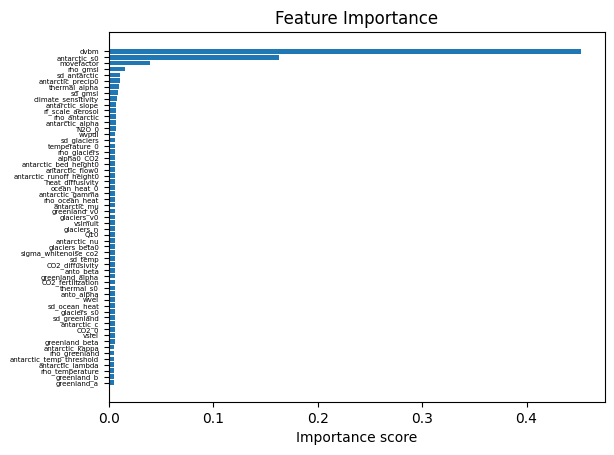

In [25]:
# Fitting the model with the best parameters

reg1 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 6, 
n_estimators= 100, max_depth=25)
reg1.fit(X_train, y_train)
pred=reg1.predict(X_train)
pred_test=reg1.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance = reg1.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");

In [26]:
CV_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 10)
CV_reg.fit(X_train, y_train)

# Getting the best parameters

CV_reg.best_params_

{'bootstrap': False,
 'max_depth': 22,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'n_estimators': 105}

MSE for Random Forest on CV train data:  0.0000004963
MSE for Random Forest on test data:  0.0000273438


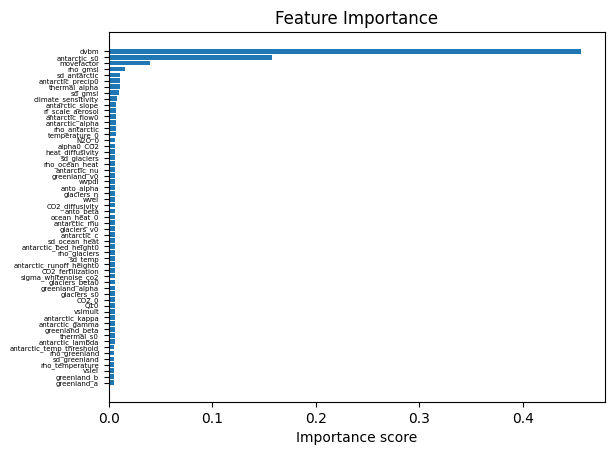

In [30]:
# Fitting the model with the best parameters

reg1 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 6, 
n_estimators= 105, max_depth=22)
reg1.fit(X_train, y_train)
pred=reg1.predict(X_train)
pred_test=reg1.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance = reg1.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");

In [31]:
CV_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV_reg.fit(X_train, y_train)

# Getting the best parameters

CV_reg.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 105}

MSE for Random Forest on CV train data:  0.0000000932
MSE for Random Forest on test data:  0.0000255898


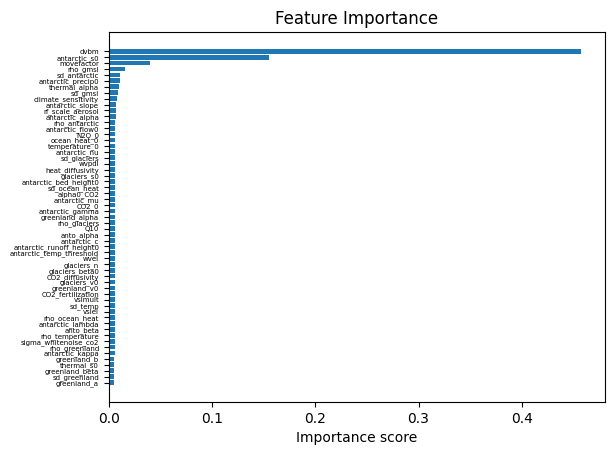

In [32]:
# Fitting the model with the best parameters

reg1 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 4, 
n_estimators= 105, max_depth=25)
reg1.fit(X_train, y_train)
pred=reg1.predict(X_train)
pred_test=reg1.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance = reg1.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");